# Homework #3

## Due Date: Tuesday, January 7, 23:59

### Part 1: Neuronal Spike Train Analysis Using Poisson Processes

   A neuroscientist is studying the firing patterns of a certain type of neuron in the brain. The average firing rate of these neurons is found to be 5 spikes per second. Assuming that the spike train of these neurons can be modeled as a Poisson process:

   a) What is the probability that the neuron fires exactly 10 times in a 2-second interval?

   b) Calculate the probability that the neuron fires at least once within a 0.1-second interval.

   c) What is the expected value of spikes for a 2 second interval?

-- your answer here --

Response:
According to the poisson equation:  
$$
p(x=k) = \frac{\lambda^k e^-\lambda}{k!}
$$

a) for the 2-second interval, \lambda = 2*5 = 10
so the probability is

$$
p(x=10) = \frac{10^{10} e^{-10}}{10!} \approx  0.125
$$

b) for the 0.1-second interval, \lambda = 0.1*5 = 0.5

$$
p(k>0) = 1- p(k=0)= 1 - \frac{0.5^{0} e^{-0.5}}{0!} \approx  0.394
$$ 

c) the expected value equal to 2*5 = 10







### Part 2: Programming a Poisson Process 

#### Notes:

- For all programming tasks, ensure that your code is well-commented to explain your logic and approach.
- Make sure to handle edge cases, such as negative values of $\lambda$ or $k$, appropriately in your functions.
- In Question 2, if you're unfamiliar with plotting libraries, focus on generating the probabilities and understanding the distribution's shape through the output values before attempting to plot.

#### Question 1: Implementing the Poisson Distribution

**Objective**: Write a program to manually calculate the probability of observing a given number of events $k$ in a fixed interval, given the average rate of occurrences $\lambda$, using the Poisson formula. You are not allowed to use any external libraries that directly compute Poisson probabilities.

**Instructions**:
1. Your program should define a function `poisson_probability(lambda, k)` that takes the average rate $\lambda$ and the desired number of occurrences $k$ as inputs.
2. The function should use the Poisson formula:
   $
   P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
   $
3. Calculate $k!$ (factorial of $k$) using a loop or recursive function.
4. Return the probability of observing exactly $k$ events.
5. Test your function by calculating the probability of observing 3 events for $\lambda = 2.5$.

In [4]:
# response

def poisson_probability(my_lambda, k):
    # k!
    k_fac = 1
    for i in range(1, k+1): # not include k+1
        k_fac *= i

    e = 2.71828

    p = (my_lambda ** k) * (e ** -my_lambda) / k_fac
    

    return p


# test when observed 3 events for lambda = 2.5
print(poisson_probability(2.5, 3)) # 0.2138





0.2137633767207251


### Question 2: Drawing a Poisson Distribution

**Objective**: Create a function to simulate and plot the Poisson distribution for a given $\lambda$ over a range of $k$ values (e.g., from 0 to 20). You may use basic plotting libraries (like matplotlib in Python) but should calculate the Poisson probabilities manually using your function from Question 1.

**Instructions**:
1. Define a function `plot_poisson_distribution(lambda, k_range)` where `lambda` is the average rate of events, and `k_range` is the maximum value of $k$ you want to plot.
2. Use your `poisson_probability` function to compute the probabilities for each $k$ from 0 to `k_range`.
3. Store the probabilities in a list or array.
4. Plot $k$ on the x-axis and the corresponding probabilities on the y-axis. Make sure to label your axes appropriately.
5. Test your plotting function with $\lambda = 4$ and `k_range = 15`.

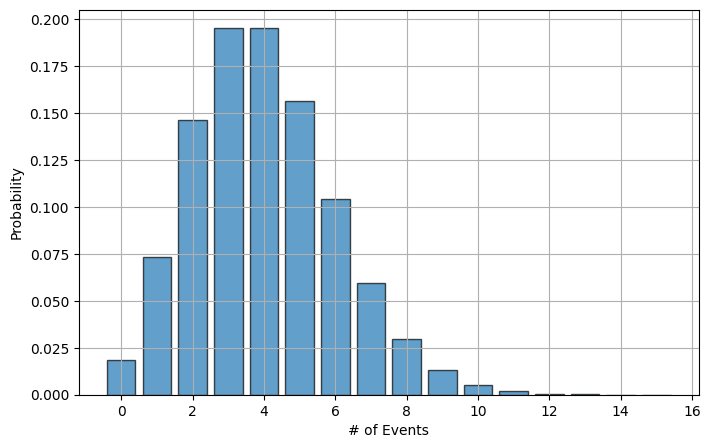

In [8]:
# your code here

import matplotlib.pyplot as plt

# my poisson function
def poisson_probability(my_lambda, k):
    # k!
    k_fac = 1
    for i in range(1, k+1): # not include k+1
        k_fac *= i

    e = 2.71828

    p = (my_lambda ** k) * (e ** -my_lambda) / k_fac
    

    return p


def plot_poisson_distribution(my_lambda, k_range):
    probabilities = [poisson_probability(my_lambda, k) for k in range(k_range + 1)] # better than for loop

    # Plot the distribution
    plt.figure(figsize=(8, 5))
    plt.bar(range(k_range + 1), probabilities, alpha=0.7, edgecolor='black')
    plt.xlabel("# of Events")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.show()


# test
plot_poisson_distribution(4, 15)


### Question 3: Calculating the Cumulative Probability

**Objective**: Write a program to calculate the cumulative probability of observing up to $n$ events for a given $\lambda$, without using any external cumulative distribution function.

**Instructions**:
1. Your program should define a function `cumulative_poisson_probability(lambda, n)` that computes the cumulative probability of observing up to $n$ events.
2. The function should sum the probabilities of observing 0 up to $n$ events, using your `poisson_probability` function from Question 1.
3. Return the cumulative probability.
4. Test your function by calculating the cumulative probability of observing up to 5 events for $\lambda = 3$.

In [10]:
# your code here

def cumulative_poisson_probability(my_lambda, n):
    cumulative_probability = 0
    
    # Sum probabilities
    for k in range(n + 1): # not include n+1
        cumulative_probability += poisson_probability(my_lambda, k)
    
    return cumulative_probability


cumulative_probability = cumulative_poisson_probability(3, 5)
print(cumulative_probability)


0.9160839065858205


### Question 4: Generating and Analyzing Spike Trains

**Objective**: Generate spike trains using a Poisson process and analyze their properties, incorporating a refractory period and exploring neuron burstiness and correlation.

**Instructions**:

#### 4.1: Generate a Poisson Spike Train
1. Use the Poisson process generator from last week to create a spike train.
2. Set the spike rate to $r_0 = 30$ spikes per second and simulate over 60 seconds.
3. Display the resulting spike train.

#### 4.2: Add a Refractory Period
1. Modify the Poisson process generator to include a refractory period parameter, set to 1 millisecond.
2. Simulate the refractory period as follows:
   - After each spike, set the firing rate to 0.
   - Allow the firing rate to recover linearly to $r_0$ with the recovery rate:
     $$
     r(t) = r_0\frac{t-t_{spike}}{5}
     $$
     where $t_{spike}$ is the time of the last spike, and both $t$ and $t_{spike}$ are in milliseconds.
   - Ensure $r(t)$ does not exceed the initial firing rate $r_0$.
3. Plot the resulting spike train overlaid with $r(t)$.

#### 4.3: Analyze the Spike Train
1. Generate the following plots for the spike train:
   - **1.3.1**: Time interval histogram (TIH).
   - **1.3.2**: Survivor function.
   - **1.3.3**: Hazard function.

In [11]:
# your code here

#### 4.1: Generate a Poisson Spike Train
# 1. Use the Poisson process generator from last week to create a spike train.

import numpy as np

def generatePoiSpikes(r, dt, totalSize):
    # because homogeneous Poisson process required, the spike probability is constant
    spike_prob = r * dt

    random_numbers = np.random.rand(totalSize) # generate random numbers between 0 and 1
    spikeTrain = (random_numbers < spike_prob) # only when the prob > random number, the spike will be generated
    
    return spikeTrain.astype(int) # convert to 0 or 1



# 2. Set the spike rate to $r_0 = 30$ spikes per second and simulate over 60 seconds.

r_0 = 30 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 60 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds

totalSize = int(totalTime / dt)
spike_train = generatePoiSpikes(r_0, dt, totalSize)


# 3. Display the resulting spike train.
print("spike_train", spike_train, spike_train.shape)












spike_train [0 0 0 ... 0 0 0] (60000,)


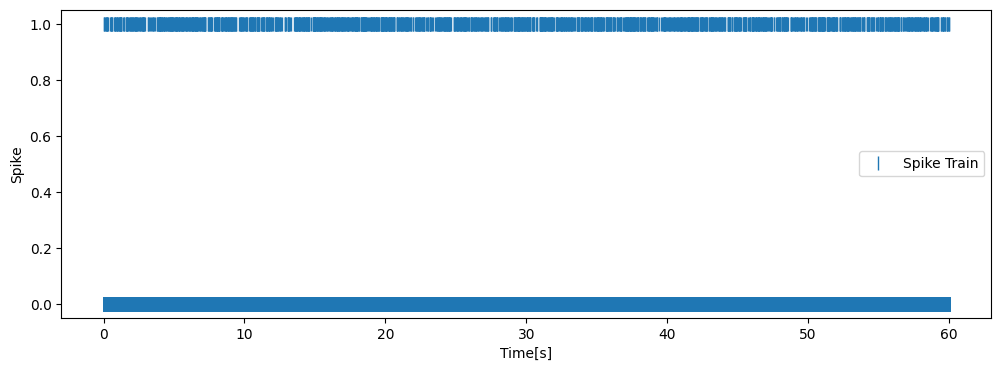

In [16]:

# #### 4.2: Add a Refractory Period
# 1. Modify the Poisson process generator to include a refractory period parameter, set to 1 millisecond.
# 2. Simulate the refractory period as follows:
#    - After each spike, set the firing rate to 0.
#    - Allow the firing rate to recover linearly to $r_0$ with the recovery rate:
#      $$
#      r(t) = r_0\frac{t-t_{spike}}{5}
#      $$
#      where $t_{spike}$ is the time of the last spike, and both $t$ and $t_{spike}$ are in milliseconds.
#    - Ensure $r(t)$ does not exceed the initial firing rate $r_0$.
# 3. Plot the resulting spike train overlaid with $r(t)$.




# so basically, the refractory period is the period that the neuron less likely to fire again, which more like real neuron behavior


import matplotlib.pyplot as plt
def generate_spike_train_with_refractory(r, dt, total_size, refractory_period):
    spike_train = np.zeros(total_size)
    last_spike_time = 0 # intial start from 0

    for t in range(total_size):
        current_time = t * dt # convert back to second according to the index of t
        time_since_last_spike = (current_time - last_spike_time) * 1000  # Convert to milliseconds because the refractory period is in milliseconds

        # Calculate the firing rate with refractory recovery
        if time_since_last_spike < refractory_period:
            firing_rate = 0 # less likely fire 
        else:
            firing_rate = min(r, r * (time_since_last_spike / 5)) # linearly recover to r0, and not exceed r0
        
        # Generate a spike based on the adjusted firing rate
        spike_probability = firing_rate * dt # recalculate the spike probability with adjusted firing rate
        if np.random.rand() < spike_probability:
            spike_train[t] = 1
            last_spike_time = current_time # when the neuron fire, update the last spike time
        else:
            spike_train[t] = 0 # not update the last spike time
    
    return spike_train

refractory_period = 1  # 1 millisecond
r_0 = 30 #spikes per second
dt = 0.001 #seconds
totalTime = 60 #seconds
dt = 0.001 #seconds
totalSize = int(totalTime / dt)

spike_train_refractory = generate_spike_train_with_refractory(r_0, dt, totalSize, refractory_period)

# Plotting the spike train
time_axis = np.arange(totalSize) * dt # the time axis

plt.figure(figsize=(12, 4))
plt.plot(time_axis, spike_train_refractory, '|', markersize=10, label="Spike Train")
plt.xlabel("Time[s]")
plt.ylabel("Spike")
plt.legend()
plt.show()

1689


/var/folders/8n/cww2twxj5fz380t4y4w5h0rm0000gn/T/ipykernel_16115/77304983.py:41: RuntimeWarning: divide by zero encountered in divide
  hazard_function = pdf/survivor_f # equation for hazard function = pdf/survivor function


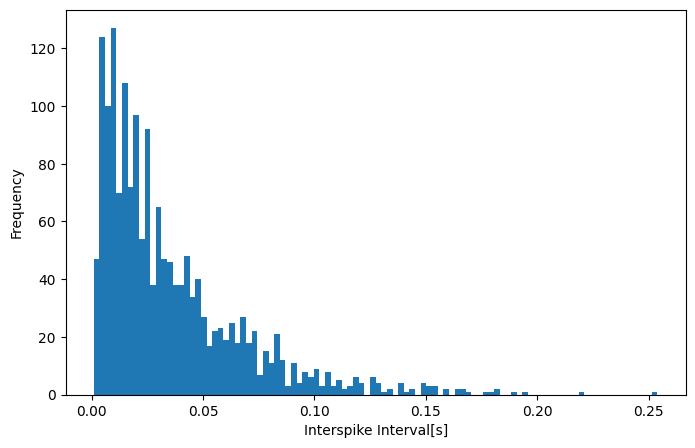

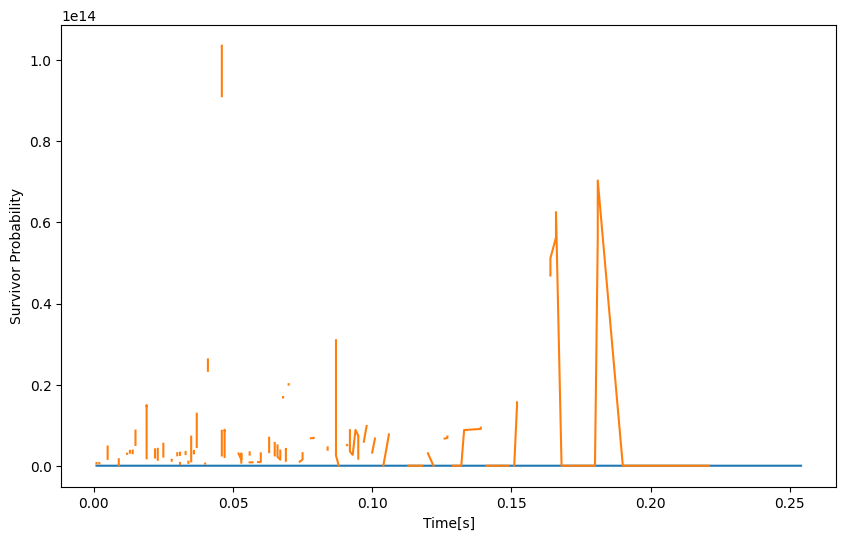

In [49]:
# #### 4.3: Analyze the Spike Train
# 1. Generate the following plots for the spike train:
#    - **1.3.1**: Time interval histogram (TIH).
#    - **1.3.2**: Survivor function.
#    - **1.3.3**: Hazard function.

# Extract spike times
spike_index = np.where(spike_train_refractory == 1)[0] # get index when the spike is 1
spike_times = spike_index * dt # convert to second

# Calculate interspike intervals (ISI)
interspike_intervals = []
for i in range(1, len(spike_times)):
    interspike_intervals.append(spike_times[i] - spike_times[i-1]) # calculate the time interval between two neighbor spikes


# Time interval histogram (TIH).
plt.figure(figsize=(8, 5))
plt.hist(interspike_intervals, bins=100)
plt.xlabel("Interspike Interval[s]")
plt.ylabel("Frequency")



#  Survivor function.
sorted_isis = np.sort(interspike_intervals) # sort the interspike intervals
survivor_f = 1 - np.arange(1, len(sorted_isis) + 1) / len(sorted_isis)
print(len(sorted_isis))

plt.figure(figsize=(10, 6))
# Plot theoretical survivor function
plt.plot(sorted_isis, survivor_f)
# Customize the plot
plt.xlabel("Time[s]")
plt.ylabel("Survivor Probability")



# # Hazard function
pdf = -np.gradient(survivor_f, sorted_isis) # get probability density function
hazard_function = pdf/survivor_f # equation for hazard function = pdf/survivor function
plt.plot(sorted_isis, hazard_function)



### Question 5: Exploring Neuronal Burstiness and Correlation

**Objective**: Extend the spike generator to model bursty neurons and analyze correlations between oscillating neurons.

#### 5.1: Simulate Bursty Neuron Activity
1. Adapt the spike generator to model a **bursty** neuron.
2. Ensure the refractory period mechanism remains intact.
3. Plot the resulting spike train for the bursty neuron.

#### 5.2: Auto-Correlation of Spike Train
1. Refactor your homemade convolution function into a correlation function.
2. Auto-correlate the spike train with itself using this function.
3. Normalize the correlation by the amplitude of the center peak and interpret its meaning.

#### 5.3: Cross-Correlation of Two Oscillating Neurons
1. Generate two oscillating neurons by first defining their $r(t)$ and then randomizing the spike train accordingly.
2. Compute the cross-correlation of the two neurons using the correlation function.
3. Interpret the result:
   - Explain the time lag (x-axis) of the peaks.
   - Describe the amplitude (y-axis) of the peaks.

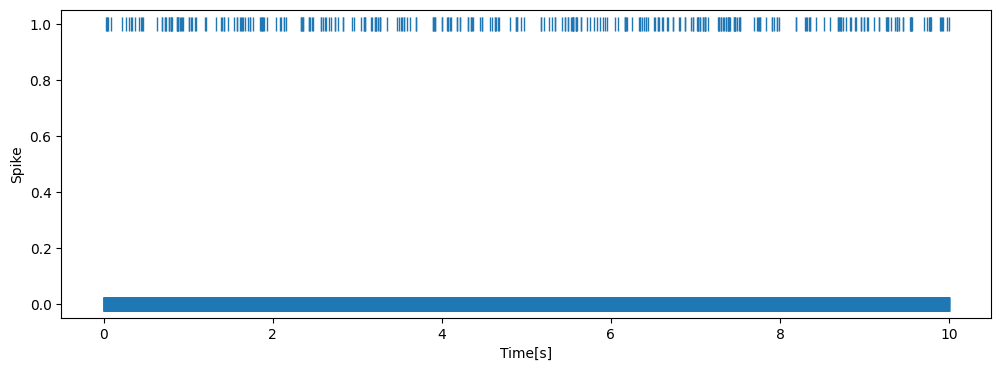

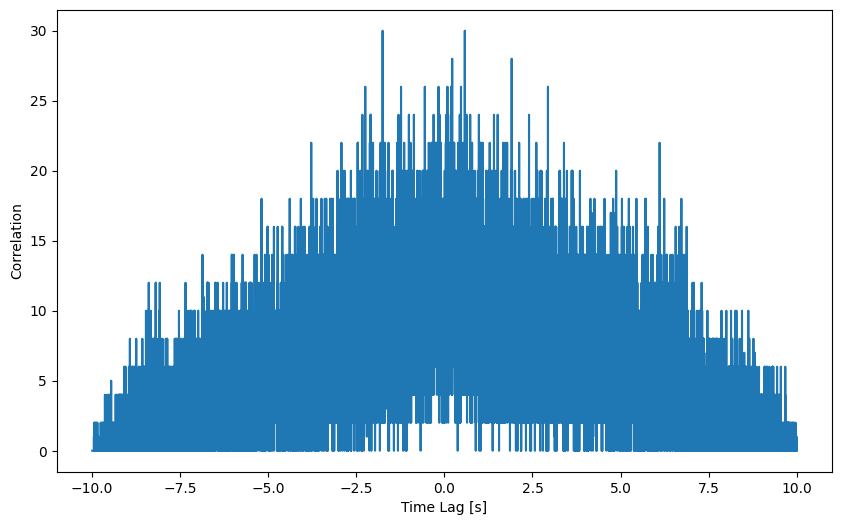

In [68]:
# response



# #### 5.1: Simulate Bursty Neuron Activity
# 1. Adapt the spike generator to model a **bursty** neuron.
# 2. Ensure the refractory period mechanism remains intact.
# 3. Plot the resulting spike train for the bursty neuron.

import numpy as np
import matplotlib.pyplot as plt

# Function to generate a bursty spike train
def generate_bursty_spike_train(r, dt, total_size, refractory_period, burst_probability, burst_size, burst_isi):
    spike_train = np.zeros(total_size)
    last_spike_time = 0 # intial start from 0


    for t in range(total_size):
        current_time = t * dt # convert back to second according to the index of t
        time_since_last_spike = (current_time - last_spike_time) * 1000  # Convert to milliseconds because the refractory period is in milliseconds


        # Calculate the firing rate with refractory recovery
        if time_since_last_spike < refractory_period:
            firing_rate = 0 # less likely fire 
        else:
            firing_rate = min(r, r * (time_since_last_spike / 5)) # linearly recover to r0, and not exceed r0
        


        # Generate a spike based on the adjusted firing rate
        spike_probability = firing_rate * dt # recalculate the spike probability with adjusted firing rate
        if np.random.rand() < spike_probability:
            spike_train[t] = 1
            last_spike_time = current_time # when the neuron fire, update the last spike time

            # Add bursty spikes
            if np.random.rand() < burst_probability:
                for _ in range(burst_size):
                    burst_time = t + int(burst_isi / dt)
                    if burst_time < total_size:
                        spike_train[burst_time] = 1

    return spike_train




refractory_period = 1  # 1 millisecond
r_0 = 30 #spikes per second
dt = 0.001 #seconds
totalTime = 60 #seconds
dt = 0.001 #seconds
totalSize = int(totalTime / dt)

# Generate bursty spike train

# suppose the burst parameters are:
burst_probability = 0.3
burst_size = 3
burst_isi = 0.003

spike_train_bursty = generate_bursty_spike_train(r_0, dt, total_size, refractory_period, burst_probability, burst_size, burst_isi)

# Plot spike train
plt.figure(figsize=(12, 4))
plt.plot(np.arange(total_size) * dt, spike_train_bursty, '|', markersize=10)
plt.xlabel("Time[s]")
plt.ylabel("Spike")




# #### 5.2: Auto-Correlation of Spike Train
# 1. Refactor your homemade convolution function into a correlation function.
# 2. Auto-correlate the spike train with itself using this function.
# 3. Normalize the correlation by the amplitude of the center peak and interpret its meaning.


# copy it from homework 2
def my_conv_function(x, y):
    # no flip of y
    x_len = len(x)
    y_len = len(y)
    total_len = x_len + y_len - 1
    result = np.zeros(total_len)

    for i in range(total_len): 
        for j in range(x_len): 
            if 0 <= i - j < y_len:  # make sure the index is in the range of y
                result[i] += x[j] * y[i - j]
    return result

def my_auto_corr_function(x, y=None):
    if y is None: # if y is not provided, assume y = x
        y = x
    conv_result = my_conv_function(x, x) # auto-correlation is the convolution of the signal with itself
    mid_point = len(conv_result) // 2 # find the mid point
    centered_result = conv_result[mid_point - len(x) + 1 : mid_point + len(x)] # get the centered result
    return centered_result


auto_corr = my_auto_corr_function(spike_train_bursty) # calculate the auto-correlation
lags = np.arange(-len(spike_train_bursty) + 1, len(spike_train_bursty)) * dt # calculate the lags

# Plot the auto-correlation
plt.figure(figsize=(10, 6))
plt.plot(lags, auto_corr)
plt.xlabel("Time Lag [s]")
plt.ylabel("Correlation")



Text(0, 0.5, 'Correlation')

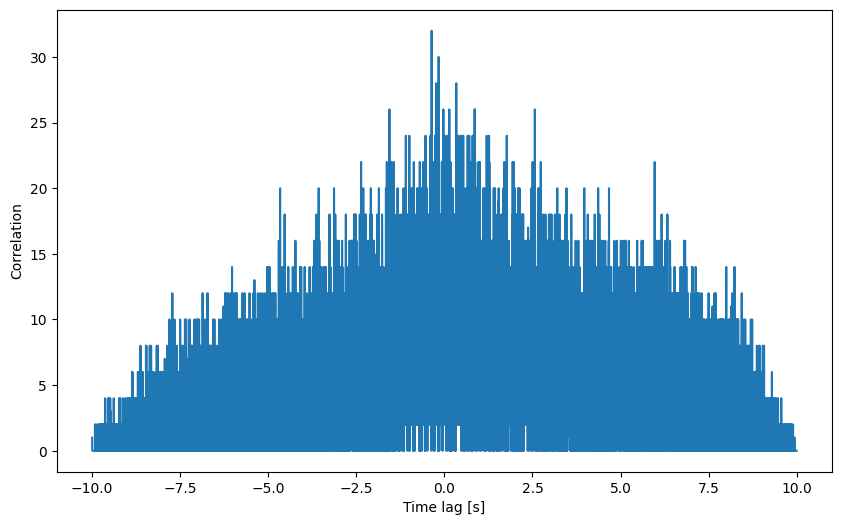

In [73]:
# #### 5.3: Cross-Correlation of Two Oscillating Neurons
# 1. Generate two oscillating neurons by first defining their $r(t)$ and then randomizing the spike train accordingly.
# 2. Compute the cross-correlation of the two neurons using the correlation function.
# 3. Interpret the result:
#    - Explain the time lag (x-axis) of the peaks.
#    - Describe the amplitude (y-axis) of the peaks.

# Generate two oscillating neurons
def generate_oscillating_spike_train(r, f, dt, total_size):
    spike_train = np.zeros(total_size)
    for t in range(total_size):
        current_time = t * dt
        firing_rate = r * (1 + np.cos(2 * np.pi * f * current_time))  # Oscillating rate
        spike_probability = firing_rate * dt
        if np.random.rand() < spike_probability:
            spike_train[t] = 1
    return spike_train



r = 30  #spikes per second
f = 30  # Frequency of oscillation (Hz)
dt = 0.001  #seconds
totalTime = 10 # set a short time, otherwise the computation will be slow
totalSize = int(totalTime / dt)


# Generate spike trains for two oscillating neurons
spike_train1 = generate_oscillating_spike_train(r, f, dt, totalSize)
spike_train2 = generate_oscillating_spike_train(r, f, dt, totalSize)


# Compute cross-correlation
cross_corr = my_auto_corr_function(spike_train1, spike_train2)


# Create lag axis
lags = np.arange(-len(spike_train1) + 1, len(spike_train1)) * dt

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr)
plt.xlabel("Time lag [s]")
plt.ylabel("Correlation")

